In [3]:
from google.colab import drive                                                      
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile
import numpy as np
import pandas as pd 
import os

df_train = pd.read_csv("/content/drive/My Drive/Input/train_labels.csv")

#train_folders = 370
train_folders = 60
#test_folders = 119
test_folders = 20


stack = 450

archive = "/content/drive/My Drive/Input/train.zip"
path_archive = "/content/drive/My Drive/Input/PARTS/"



In [0]:
##############################################

fantasy_zip = zipfile.ZipFile(archive)

for i in range(0,train_folders):
  for j in range(0,stack):
    fantasy_zip.extract(df_train.iloc[i*stack + j]['id'] + '.tif', path_archive + 'train_part' + str(i + 1))
fantasy_zip.close()

##############################################

In [0]:
##############################################

fantasy_zip = zipfile.ZipFile(archive)

for i in range(train_folders, train_folders + test_folders):
  for j in range(0,stack):
    fantasy_zip.extract(df_train.iloc[i * stack + j]['id'] + '.tif', path_archive + 'test_part' + str(i + 1 - train_folders))
fantasy_zip.close()

##############################################

In [0]:
os.listdir(path_archive)

In [0]:
num_train = stack * train_folders
num_test = stack * test_folders

#X_train = np.zeros((num_train,96,96,3))
X_train = [None] * num_train
y_train = np.zeros(num_train)

#X_test = np.zeros((num_test,96,96,3))
X_test = [None] * num_test
y_test = np.zeros(num_test)




In [0]:
os.listdir(path_archive + 'train_part' + str(15))



In [24]:
print(' 502fd529d106ec398aa9ea3ad3f06c4e039aabba.tif')

 502fd529d106ec398aa9ea3ad3f06c4e039aabba.tif


In [0]:
from PIL import Image

for i in range (0,train_folders):
    for j in range (0,stack):
      if(df_train.iloc[i * stack + j]['id'] + '.tif' != '502fd529d106ec398aa9ea3ad3f06c4e039aabba.tif'):
        pic = path_archive + 'train_part' + str(i + 1) +'/' + df_train.iloc[i * stack + j]['id'] + '.tif'
        im = Image.open(pic)
        X_train[i * stack + j] = np.array(im)
        y_train[i * stack + j] = df_train.iloc[i * stack + j]['label']
      

In [8]:
X_train[6419] = X_train[1000] # тот, где не считалось 502fd529d106ec398aa9ea3ad3f06c4e039aabba.tif'
type(X_train[6419])

numpy.ndarray

In [9]:
print(len(X_train)) 
type(X_train[6419])



27000


numpy.ndarray

In [0]:
NUM_FOLDER_TEST = 370

for i in range (0, test_folders):
    for j in range (0,stack):
      pic = path_archive + 'test_part' + str(i + 1) +'/' + df_train.iloc[ (i + NUM_FOLDER_TEST) * stack + j]['id'] + '.tif'
      im = Image.open(pic)
      X_test[i * stack + j] = np.array(im)
      y_test[i * stack + j] = df_train.iloc[ (i + NUM_FOLDER_TEST) * stack + j]['label']
      

      

In [21]:
from keras.models import Model 
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.callbacks import History
import cv2 
import numpy as np
import pandas as pd 
import random

batch_size = 64
num_epochs = 200
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 8 # we will initially have 16 kernels per conv. layer...
conv_depth_2 = 16 # ...switching to 32 after the first pooling layer
conv_depth_3 = 32 
conv_depth_4 = 64 
conv_depth_5 = 128 
drop_prob_1 = 0.1 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # 
hidden_size = 16

height, width, depth = 96, 96, 3


history = History() 
X_test /= np.max(X_train)
X_train /= np.max(X_train)
#Y_train = np_utils.to_categorical(y_train, num_classes) 
#Y_test = np_utils.to_categorical(y_test, num_classes)

inp = Input(shape=(width, height, depth)) 
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, border_mode='same', activation='relu')(inp)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1)
drop_1 = Dropout(drop_prob_1)(pool_1)
conv_2 = Convolution2D(conv_depth_2, kernel_size, kernel_size, border_mode='same', activation='relu')(drop_1)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_2 = Dropout(drop_prob_1)(pool_2)
conv_3 = Convolution2D(conv_depth_3, kernel_size, kernel_size, border_mode='same', activation='relu')(drop_2)
pool_3 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_3)
drop_3 = Dropout(drop_prob_1)(pool_3)
conv_4 = Convolution2D(conv_depth_4, kernel_size, kernel_size, border_mode='same', activation='relu')(drop_3)
pool_4 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_4 = Dropout(drop_prob_1)(pool_4)
conv_5 = Convolution2D(conv_depth_5, kernel_size, kernel_size, border_mode='same', activation='relu')(drop_4)
pool_5 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_5)
drop_5 = Dropout(drop_prob_1)(pool_5)
flat = Flatten()(drop_5)
hidden = Dense(hidden_size, activation='relu')(flat)
out = Dense(1, activation='sigmoid')(hidden)

#tensorboard = TensorBoard(log_dir='D://Logs//logs', write_graph=True)


model = Model(input=inp, output=out) 

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']) 

model.fit(X_train, y_train, 
          batch_size=batch_size, nb_epoch=num_epochs,
          verbose=1, validation_split=0.1, callbacks=[history]) 

model.evaluate(X_test, y_test, verbose=1) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` ca

Train on 24300 samples, validate on 2700 samples
Epoch 1/200
24300/24300 [==============================] - 11s 471us/step - loss: 0.5430 - acc: 0.7344 - val_loss: 0.6200 - val_acc: 0.6748
Epoch 2/200
24300/24300 [==============================] - 10s 422us/step - loss: 0.4707 - acc: 0.7854 - val_loss: 0.4594 - val_acc: 0.7852
Epoch 3/200
24300/24300 [==============================] - 11s 436us/step - loss: 0.4486 - acc: 0.7981 - val_loss: 0.4502 - val_acc: 0.7978
Epoch 4/200
24300/24300 [==============================] - 11s 442us/step - loss: 0.4238 - acc: 0.8101 - val_loss: 0.4764 - val_acc: 0.7852
Epoch 5/200
24300/24300 [==============================] - 11s 439us/step - loss: 0.4122 - acc: 0.8155 - val_loss: 0.4815 - val_acc: 0.7989
Epoch 6/200
24300/24300 [==============================] - 10s 426us/step - loss: 0.3936 - acc: 0.8270 - val_loss: 0.3881 - val_acc: 0.8207
Epoch 7/200
24300/24300 [==============================] - 11s 435us/step - loss: 0.3831 - acc: 0.8328 - val_lo

[0.45484454620546766, 0.8734444444444445]

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 96, 96, 8)         224       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 8)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 16)        1168      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 24, 24, 16)        0         
__________

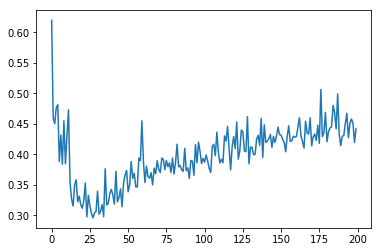

In [23]:
import matplotlib.pyplot as plt
#print(history.history.keys())
#print(history.history['val_loss'])
plt.plot(history.history['val_loss'])

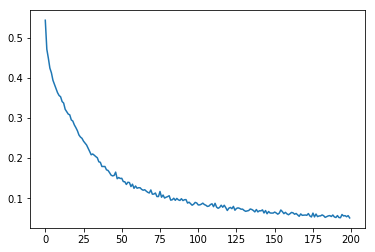

In [24]:
plt.plot(history.history['loss'])

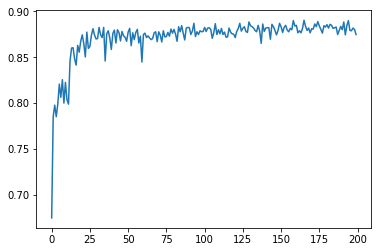

In [25]:
plt.plot(history.history['val_acc'])

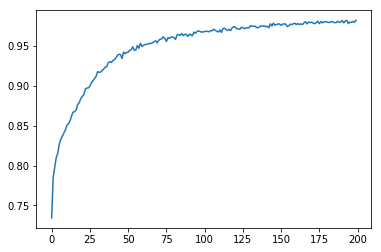

In [26]:
plt.plot(history.history['acc'])

In [0]:
predicts=model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
true= y_test.reshape((num_test,1))
true = true.astype('float32')
print(classification_report(true, predicts > 0.5))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      5355
         1.0       0.87      0.81      0.84      3645

    accuracy                           0.87      9000
   macro avg       0.87      0.86      0.87      9000
weighted avg       0.87      0.87      0.87      9000

